In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

In [2]:
#read dataset
df=pd.read_csv("C:\\Users\\Dear\\Desktop\\courses\\Distributed system\\cicddos2019_dataset.csv")
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [3]:
df.shape

(431371, 80)

In [4]:
#checking if there is null values
df.isnull().sum()

Unnamed: 0                0
Protocol                  0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Idle Std                  0
Idle Max                  0
Idle Min                  0
Label                     0
Class                     0
Length: 80, dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
431366    False
431367    False
431368    False
431369    False
431370    False
Length: 431371, dtype: bool

In [7]:
#checking if there is duplicated values
df.duplicated().sum()

0

In [8]:
#checking if the data is balanced according to Protocols used
print (sorted(Counter(df['Protocol']).items()))

[(0, 1752), (6, 116951), (17, 312668)]


C:\Users\Dear\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Protocol', ylabel='count'>

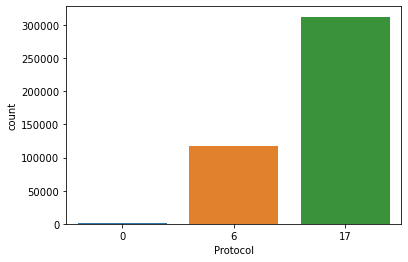

In [9]:
sns.countplot(df["Protocol"])

In [10]:
#the data is imbalanced
X=df
Y=df['Protocol']

In [11]:
X.drop(['Protocol'], axis=1,inplace=True)

In [12]:
X.columns

Index(['Unnamed: 0', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST F

In [13]:
from imblearn import over_sampling

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
#balancing using oversampling
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,Y)
print (sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 312668), (6, 312668), (17, 312668)] (938004,)


In [16]:
X_resampled.head()

,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,2,2,0,802.0,0.0,401.0,401.0,401.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,48,2,0,766.0,0.0,383.0,383.0,383.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,107319,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,107271,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [17]:
X_resampled.shape

(938004, 79)

In [18]:
#rearranging data
bf=X_resampled
bf.insert(0, "Protocol", y_resampled)


In [19]:
#new balanced data
bf.head()

,Protocol,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,0,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,1,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,2,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,3,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,4,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [20]:
#shape of new balanced data
bf.shape

(938004, 80)

In [21]:

from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder=LabelEncoder()

In [23]:
bf["Label"]=label_encoder.fit_transform(bf["Label"])

In [24]:
bf["Class"]=label_encoder.fit_transform(bf["Class"])

In [25]:
bf.head()

,Protocol,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,0,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
1,17,1,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
2,17,2,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
3,17,3,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
4,17,4,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
d=scaler.fit_transform(bf)

In [28]:
d=pd.DataFrame(d,columns=list(bf.columns))

In [29]:
d

,Protocol,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,1.000000,0.000000,1.805269e-03,0.000058,0.000000,1.367708e-04,0.000000e+00,0.012235,0.150634,0.115412,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.823529,0.0
1,1.000000,0.000003,8.333421e-09,0.000012,0.000000,5.253361e-05,0.000000e+00,0.012484,0.188175,0.132989,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.823529,0.0
2,1.000000,0.000007,3.916708e-07,0.000012,0.000000,5.017550e-05,0.000000e+00,0.011924,0.179728,0.127019,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.823529,0.0
3,1.000000,0.000010,8.943260e-04,0.000035,0.000000,9.157356e-05,0.000000e+00,0.011488,0.154857,0.115909,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.823529,0.0
4,1.000000,0.000013,8.939260e-04,0.000035,0.000000,9.419369e-05,0.000000e+00,0.012111,0.154857,0.119226,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.823529,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937999,0.352941,0.017100,2.827780e-04,0.000023,0.000063,4.978248e-06,0.000000e+00,0.001183,0.000000,0.008402,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
938000,0.352941,0.275732,1.800019e-06,0.000000,0.000063,3.930196e-07,2.053757e-07,0.000187,0.002816,0.001990,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
938001,0.352941,0.117626,5.366535e-01,0.000104,0.000063,3.930196e-06,2.053757e-07,0.000187,0.002816,0.001990,...,4.196702e-07,0.000001,0.000001,2.468648e-08,0.135040,0.043630,0.161496,0.112176,0.705882,0.0
938002,0.352941,0.558318,6.126430e-02,0.000012,0.000252,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [30]:
target_name='Class'       #feature matrix
y=d[target_name]
x=d.drop([target_name],axis=1)

In [31]:
#separate dataset into train and test
#using pearson
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
#with the following function we can select highly corrolated features
#it will remove the first feature that is corrolated with anything other feature
def correlation(dataset,threshold):
    col_corr=set()                   #set of all the names of corrolated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) < threshold:
                colname=corr_matrix.columns[i]            #getting the name of column
                col_corr.add(colname)
                
    return col_corr            

In [36]:
ncorr_features=correlation(x_train,0.7)
len(set(ncorr_features))

66

In [37]:
ncorr_features

{'ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

In [38]:
x_train.drop(ncorr_features,axis=1)

,Protocol,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,PSH Flag Count,ECE Flag Count,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
100499,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184729,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856139,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733583,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882371,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152315,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435829,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x_test.drop(ncorr_features,axis=1)

,Protocol,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,PSH Flag Count,ECE Flag Count,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
355640,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75737,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77542,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72144,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493336,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497918,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363471,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237021,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
#instantiate the model
model=linear_model.LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=model.predict(x_test)

In [44]:
#print model performance
print(r2_score(y_test,y_pred))

0.9431189794951961


In [45]:
from sklearn import svm

In [47]:
# Instantiate SVM classifier
#fit model
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [48]:
y_predict=classifier.predict(x_test)

In [49]:
#print model performances
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9999893390949602
